<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1_xgb%2Crf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑몰 지점별 매출액 예측


https://dacon.io/competitions/official/235942/data

## train data
- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)


## test data

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부

어떤 프로모션을 진행해야 판매량이 올라갈까요?💥

매장 주변의 날씨가 판매량에 영향을 미치지는 않을까요?🌞

혹은 지역 사회의 실업률도 영향을 미칠 수 있지 않을까요?



쇼핑몰 매장별 프로모션 정보, 주변 날씨, 실업률, 연료 가격 등의 정보를 바탕으로

쇼핑몰의 각 지점별 주간 매출액을 예측해주세요!

## 해볼 것
- 군집분석


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:
plt.rc('font',family='NanumBarunGothic')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
sample=pd.read_csv('/content/sample_submission.csv')

In [4]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [6]:
train.isna().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Date          180 non-null    object 
 3   Temperature   180 non-null    float64
 4   Fuel_Price    180 non-null    float64
 5   Promotion1    178 non-null    float64
 6   Promotion2    45 non-null     float64
 7   Promotion3    161 non-null    float64
 8   Promotion4    146 non-null    float64
 9   Promotion5    180 non-null    float64
 10  Unemployment  180 non-null    float64
 11  IsHoliday     180 non-null    bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
test.isna().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

# 1. 데이터 전처리

- NULL값 없애기
- 필요없는 변수 없애기(id)
- date 분리
- isholiday에서 날짜 처리


## id 없애기

In [8]:
train.drop('id',axis=1,inplace=True)

In [9]:
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [10]:
test.drop('id',axis=1,inplace=True)
test.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


## NULL값 처리
 promotion의 NAN값들이 많아 다 처리해주겠다. 0으로 처리하겠다. 

In [11]:
train=train.fillna(0)
train.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [12]:
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [13]:
test=test.fillna(0)
test.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

## isholiday에서 숫자로 처리 

휴일은 1로 휴일이 아닌날은 0으로 처리하겠다. 

In [14]:
train['IsHoliday'].value_counts()

False    5805
True      450
Name: IsHoliday, dtype: int64

True가 휴일, False가 휴일이 아닌 것을 알 수 있다. 

In [15]:
train.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales'],
      dtype='object')

In [16]:
mapping={True:1,False:0}

train['IsHoliday']=train['IsHoliday'].astype('object')
test['IsHoliday']=test['IsHoliday'].astype('object')


In [17]:
train['IsHoliday']=train['IsHoliday'].map(mapping)
test['IsHoliday']=test['IsHoliday'].map(mapping)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   int64  
 11  Weekly_Sales  6255 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 586.5+ KB


In [ ]:
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68


## date 분리

In [18]:
train['date']=pd.to_datetime(train['Date'])

In [19]:
train.head()

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,date
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90,2010-05-02
1,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44,2010-12-02
2,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17,2010-02-19
3,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59,2010-02-26
4,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68,2010-05-03


In [20]:
test['date']=pd.to_datetime(test['Date'])

In [21]:
#date 삭제
train.drop('Date',axis=1,inplace=True)
test.drop('Date',axis=1,inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6255 non-null   int64         
 1   Temperature   6255 non-null   float64       
 2   Fuel_Price    6255 non-null   float64       
 3   Promotion1    6255 non-null   float64       
 4   Promotion2    6255 non-null   float64       
 5   Promotion3    6255 non-null   float64       
 6   Promotion4    6255 non-null   float64       
 7   Promotion5    6255 non-null   float64       
 8   Unemployment  6255 non-null   float64       
 9   IsHoliday     6255 non-null   int64         
 10  Weekly_Sales  6255 non-null   float64       
 11  date          6255 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 586.5 KB


# EDA

## 기온(temperature)

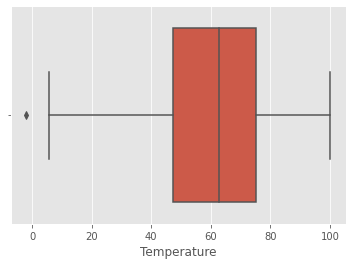

In [ ]:
sns.boxplot(data=train,x='Temperature')

## 연료가격(Fuel_Price)

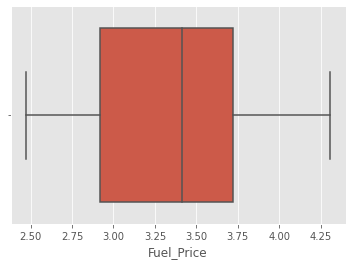

In [ ]:
sns.boxplot(data=train,x='Fuel_Price')

## 실업률(Unemployment)

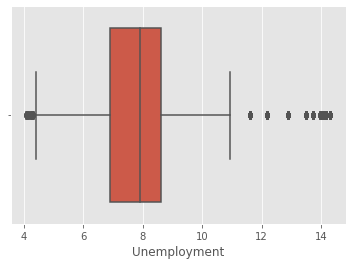

In [ ]:
sns.boxplot(data=train,x='Unemployment')

## 주간 매출액

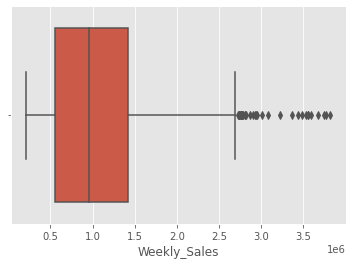

In [ ]:
sns.boxplot(data=train,x='Weekly_Sales')

In [ ]:
train.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2',
       'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment', 'IsHoliday',
       'Weekly_Sales', 'date'],
      dtype='object')

## Store

- store 개수
- store별 온도 평균
- store별 연료 가격
- store별 promotion(?) 이건 우째야 함
- store별 실업률
- store별 weekly sales

In [ ]:
train['Store'].value_counts().sort_index()

1     139
2     139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
22    139
23    139
24    139
25    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
45    139
Name: Store, dtype: int64

45개의 지점. 

## Store별로 변수들의 평균 값 

In [ ]:
store_data=train.groupby('Store').mean()
store_data

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
Store,,,,,,,,,,
1,68.339568,3.209345,2869.991583,888.514388,440.523453,1335.921727,1746.625540,7.640273,0.071942,1.555088e+06
2,68.243381,3.209345,3771.474173,1596.876043,612.674317,1699.350863,2264.660791,7.665683,0.071942,1.926625e+06
3,71.395252,3.209345,1105.615827,296.791367,288.533237,317.180216,433.616619,7.209878,0.071942,4.021757e+05
4,62.258633,3.206331,3294.725108,1410.654388,685.745252,1828.043813,2302.223237,6.024712,0.071942,2.093196e+06
5,69.405540,3.209345,1064.618921,298.585755,227.846043,393.072086,885.455683,6.320540,0.071942,3.178013e+05
6,69.703669,3.209345,2949.445108,1274.634892,664.196043,1331.390360,1918.040144,6.643676,0.071942,1.567700e+06
7,39.601439,3.227108,2290.101007,453.351223,316.953669,605.042590,1253.931151,8.615338,0.071942,5.724965e+05
8,62.556331,3.209345,2538.412446,816.145468,372.185324,606.948705,2026.888705,6.119698,0.071942,9.083112e+05
9,67.824604,3.209345,1149.491007,282.471583,337.554532,359.577842,1293.008417,6.132856,0.071942,5.433975e+05


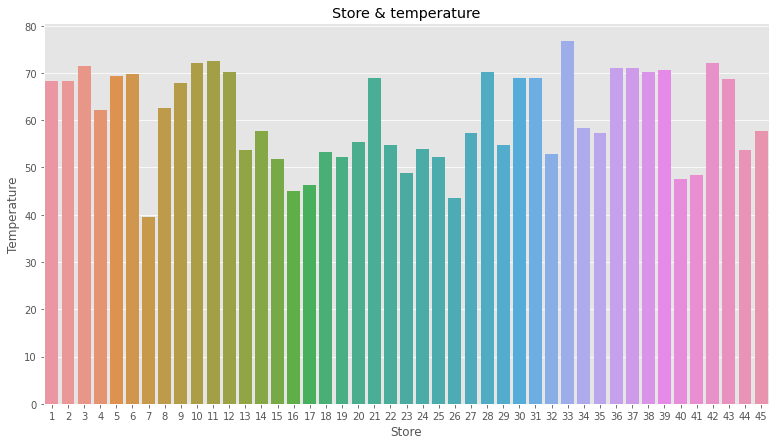

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & temperature')
sns.barplot(data=store_data,x=store_data.index,y='Temperature')

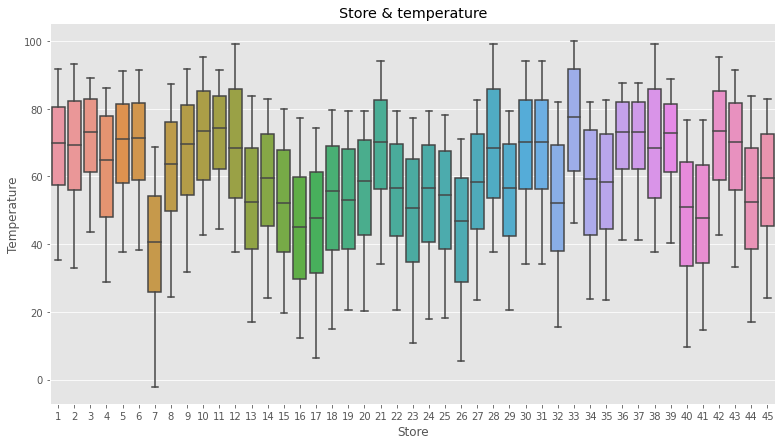

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & temperature')
sns.boxplot(data=train,x='Store',y='Temperature')

7번 매장이 가장 기온이 낮고 34번 매장이 기온이 높은 것을 볼 수 있다. 

## Store & Fuel 

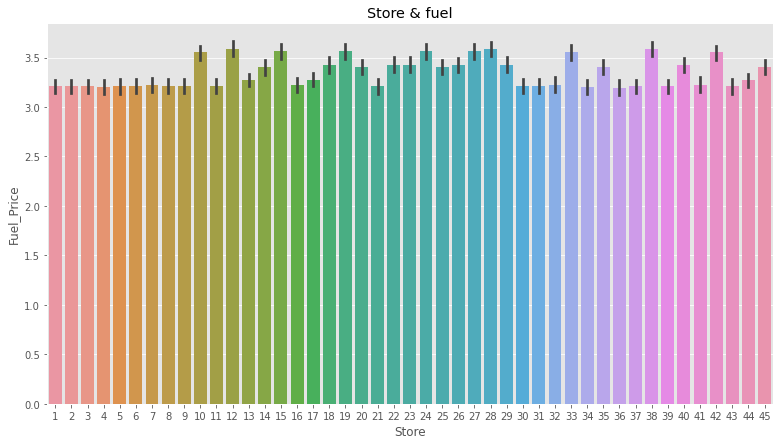

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & fuel')
sns.barplot(data=train,x='Store',y='Fuel_Price')

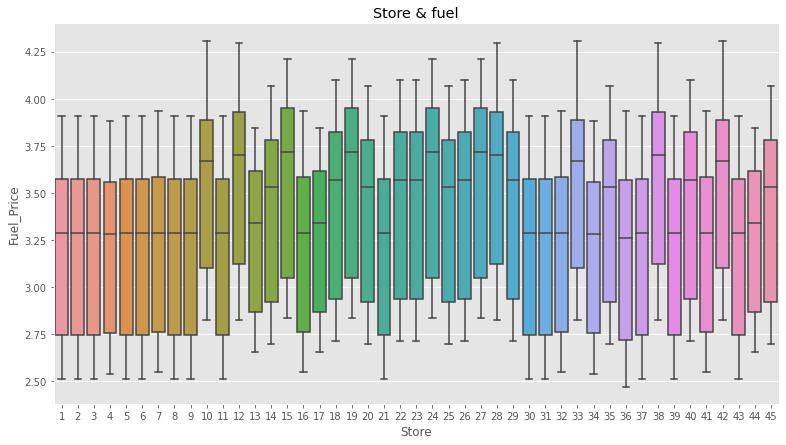

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & fuel')
sns.boxplot(data=train,x='Store',y='Fuel_Price')

## Store & Umemployment



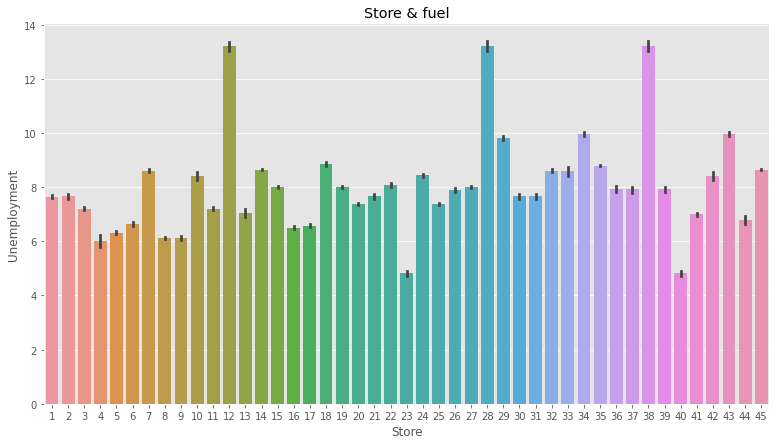

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & fuel')
sns.barplot(data=train,x='Store',y='Unemployment')

실업률은 12,28,38 매장이 높은 것을 볼 수 있다. 
그리고 23, 40이 실업률이 낮다. 

## Weekly_sales와 변수들의 관계

### Weekly_sales & store

In [ ]:
train.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2',
       'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment', 'IsHoliday',
       'Weekly_Sales', 'date'],
      dtype='object')

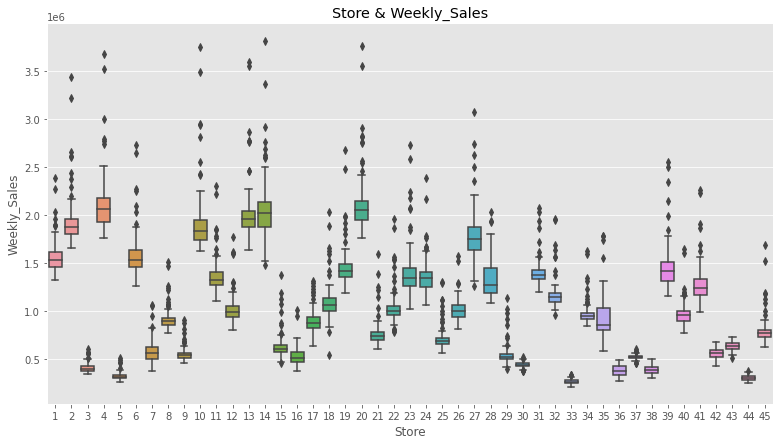

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Store & Weekly_Sales')
sns.boxplot(data=train,x='Store',y='Weekly_Sales')

대체적으로 3,5,30,33,44 매장이 매출액이 적은 편이고 
4,14,3,이 매출이 높은 편이다. 

### Weekly_Sales & date

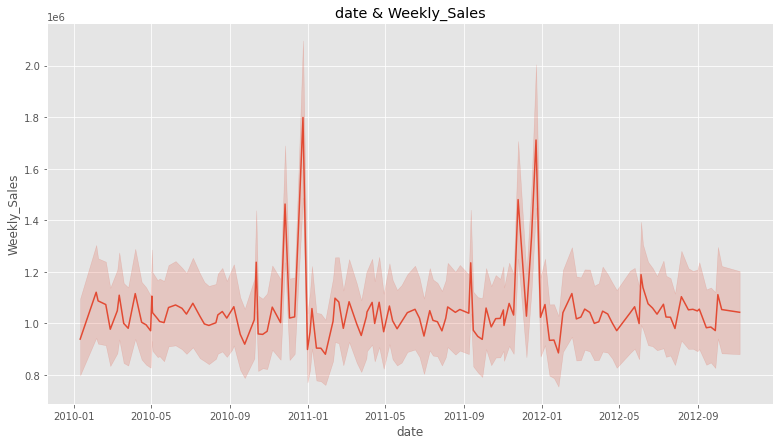

In [ ]:
plt.figure(figsize=(13,7))
plt.title('date & Weekly_Sales')
sns.lineplot(data=train,x='date',y='Weekly_Sales')

주기성을 보임. 시계열 예측도 가능할 것 같음. 

- 연말에 매출액이 급속도로 뛰는 것을 볼 수 있음. 

### weekly_sales & temperature

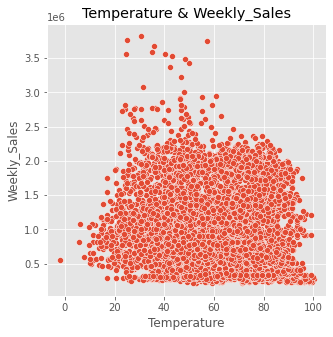

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Temperature & Weekly_Sales')
sns.scatterplot(data=train,x='Temperature',y='Weekly_Sales')

온도와는 큰 상관이 없어보이나 20~60사이의 기온일 때 매출액이 컸다는 것을 볼 수 있다. 위의 날짜별 매출액 그래프를 보았을 때 계절별 기온과 영향이 있을 수도 있겠다. 

-> 날짜별 기온 그래프 보기

#### Date & Temperatrue

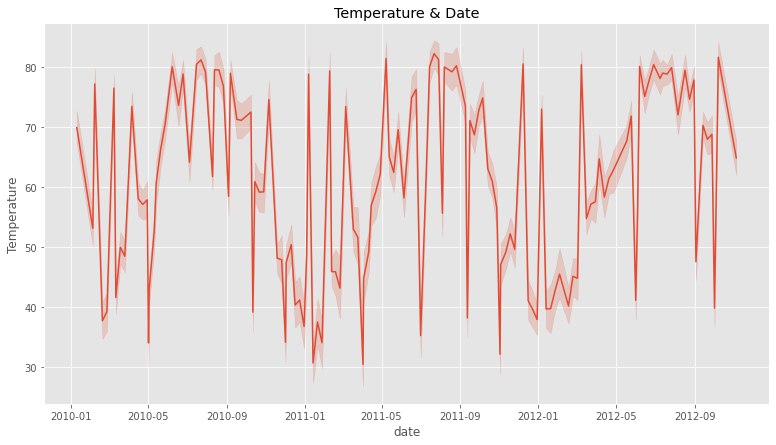

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Temperature & Date')
sns.lineplot(data=train,x='date',y='Temperature')

매출액이 높았던 9월과 1월 사이의 온도가 30과 50사이인것을 보면 얼추 가설이 맞는 듯 싶다. 

### Weekly_Sales & Fuel_Price

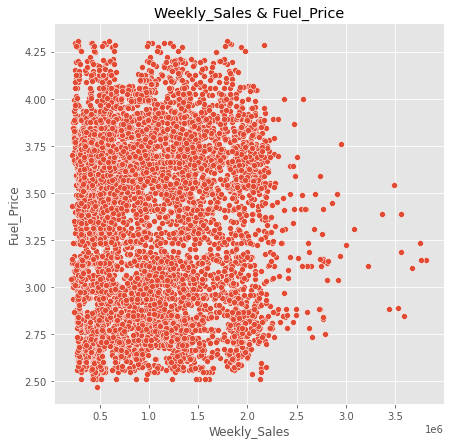

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Weekly_Sales & Fuel_Price')
sns.scatterplot(data=train,x='Weekly_Sales',y='Fuel_Price')

일주일 매출액과 연료 가격은 상관관계가 없는 것 같다. 

### Weekly_Sales & Unemployment

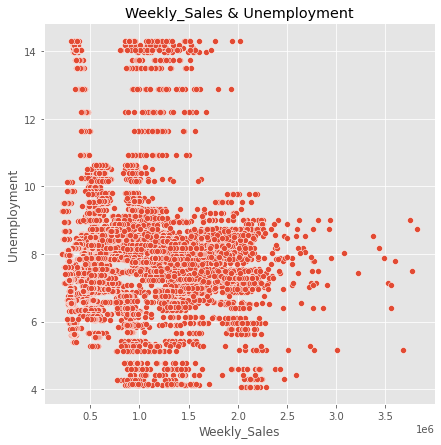

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Weekly_Sales & Unemployment')
sns.scatterplot(data=train,x='Weekly_Sales',y='Unemployment')

이것도 딱히 상관관계는 없어보이나 실업률이 클수록 매출액도 적은 모습을 보여준다. 

### Weekly_Sales & IsHoliday

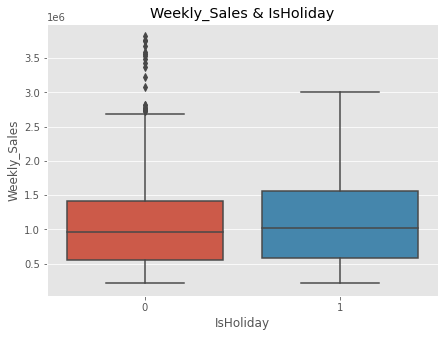

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Weekly_Sales & IsHoliday')
sns.boxplot(data=train,x='IsHoliday',y='Weekly_Sales')

주말에 아주 조금 더 나은 매출액을 보여주나 미미한 차이이다. 주중에도 매출액이 꽤 높은 날이 있긴 하다. outlier가 보임 

## 상관관계

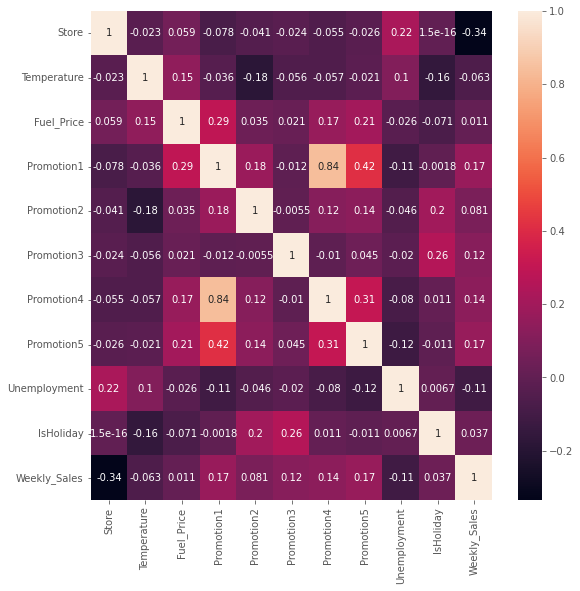

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(),annot=True)

Promotion1과 promotion4와 큰 관계

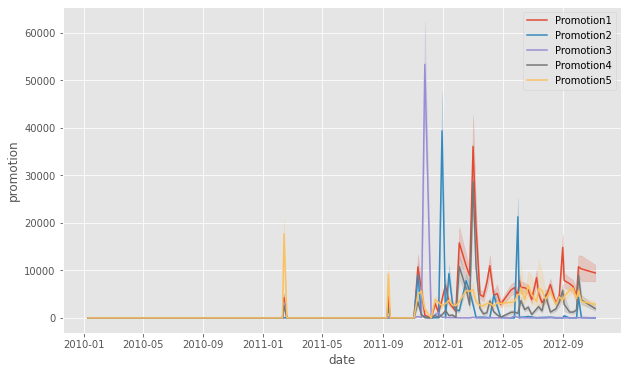

In [ ]:
plt.figure(figsize=(10,6))

plt.ylabel('promotion')
sns.lineplot(data=train,x='date',y='Promotion1')
sns.lineplot(data=train,x='date',y='Promotion2')
sns.lineplot(data=train,x='date',y='Promotion3')
sns.lineplot(data=train,x='date',y='Promotion4')
sns.lineplot(data=train,x='date',y='Promotion5')
plt.legend(('Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'))

plt.show()

프로모션이 뭐임

https://ji-ya.tistory.com/19
1. 세일
2. 무료배송
3. 사은품 증정
4. 쿠폰 증정
5. 연예인 활용
6. 특별한 날
7. 상품패키지
8. 1+1

- promotion5는 2012년부터 꾸준하게 조금씩 해왔음
- promotion3은 2011년말에 했다가 주춤..
- promotion2도 마찬가지
- promotion1,promotion4도 꾸준히 하고 있지만 2012년 3,4월 쯤에 수치가 확 올리감. 도대체 이게 뭔데 ㅠㅜㅠㅜㅠㅜㅠㅜㅠㅠㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ



# 데이터 전처리 2차

- 날짜 분리하기 

In [22]:
train['year']=train['date'].dt.year

In [23]:
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['weekday']=train['date'].dt.weekday

In [24]:
train.head()

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,date,year,month,day,weekday
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90,2010-05-02,2010,5,2,6
1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44,2010-12-02,2010,12,2,3
2,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17,2010-02-19,2010,2,19,4
3,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59,2010-02-26,2010,2,26,4
4,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68,2010-05-03,2010,5,3,0


In [25]:
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['weekday']=test['date'].dt.weekday

In [26]:
test.head()

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,date,year,month,day,weekday
0,1,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,0,2012-05-10,2012,5,10,3
1,1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,0,2012-12-10,2012,12,10,0
2,1,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,0,2012-10-19,2012,10,19,4
3,1,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,0,2012-10-26,2012,10,26,4
4,2,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,0,2012-05-10,2012,5,10,3


In [26]:
train.drop('date',axis=1,inplace=True)
test.drop('date',axis=1,inplace=True)

# EDA 2차

## year & Weekly_Sales

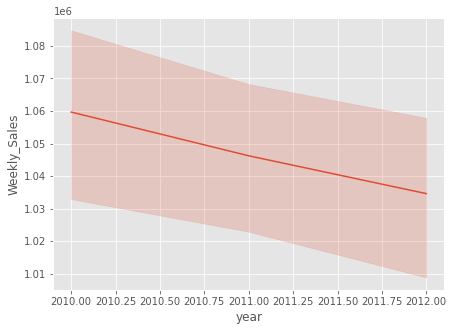

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='year',y='Weekly_Sales')

감소하는 추세를 보여준다. 

## month & Weekly_Sales

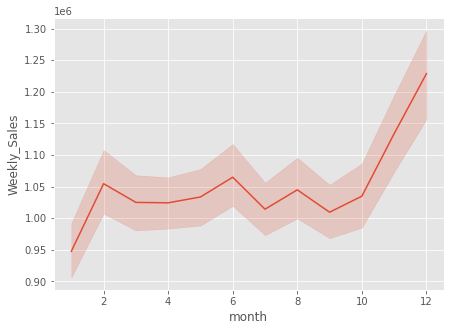

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='month',y='Weekly_Sales')

12에 갑자기 증가하는 것을 볼 수 있음. 


## day & Weekly_Sales

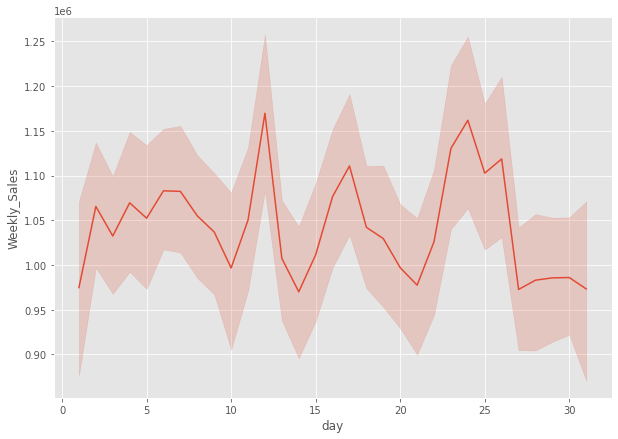

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=train,x='day',y='Weekly_Sales')

12일~13일에 갑자기 증가하다가 23 ~ 25일 쯤에 증가... 왤까

## weekday & Weekly_Sales

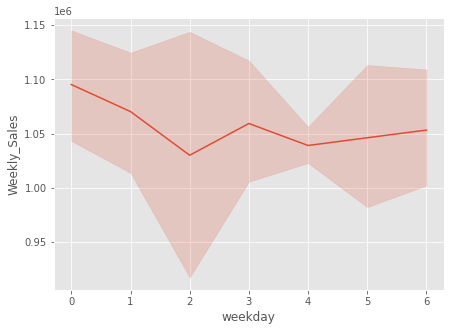

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='weekday',y='Weekly_Sales')

- 월 : 0
- 화 : 1
- 수 : 2
..
..
.
.

월요일에 가장 많았다가 수요일에 가장 매출액이 낮다. 그리고 목요일에 갑자기 조금 증가 \

## 상관관계

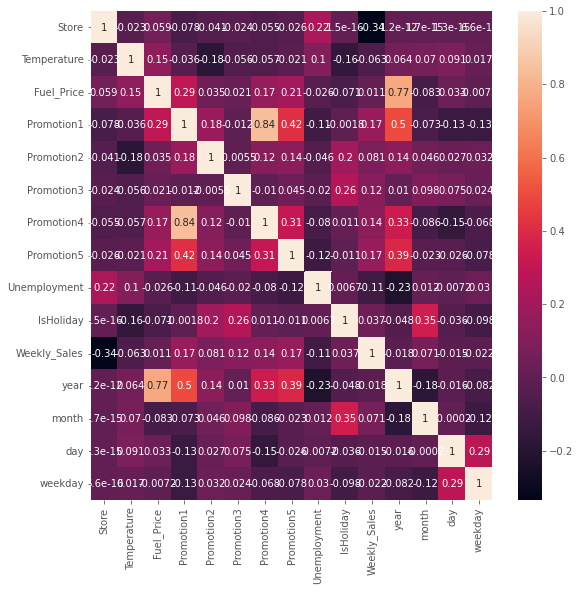

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(),annot=True)

조금 재미있는 결과가 나왔다. year과 연료 가격이 꽤 큰 관계를 보인다. 그리고 프로모션1이 년도와 상관관계를 보이고 있다. 

# 파생변수

- 뭐가 있을까

# 데이터 나누기

In [27]:
X_train=train.drop('Weekly_Sales',axis=1)
y_train=train['Weekly_Sales']
X_test=test

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(6255, 14)
(6255,)
(180, 14)


# 모델링

voting으로 앙상블 하려고 했는데 안돌아감 ㅅㅂ

- 회귀
- 군집분석
- automl


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [29]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

estimators=[]

xgb=XGBRegressor()
estimators.append(xgb)

rf=RandomForestRegressor()
estimators.append(rf)

etr=ExtraTreesRegressor()
estimators.append(etr)

params=[]

params_xgb={
    'n_estimators':[50,100,150,200,300,400],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'min_child_weight':[1,5,7,10],
    'max_depth':[5,6,7,9],
    'subsample':[0.1,0.3],
    #'colsample_bytree':[0.5,0.55,1]
}
params.append(params_xgb)

params_rf={
    'n_estimators':[100,120,150,200],
    'min_samples_split':[1,3,5,7,10]
}
params.append(params_rf)

params_etr={
    'n_estimators':[100,110,120,130,140,150]
}
params.append(params_etr)

In [30]:
params

[{'learning_rate': [0.05, 0.1, 0.15, 0.2],
  'max_depth': [5, 6, 7, 9],
  'min_child_weight': [1, 5, 7, 10],
  'n_estimators': [50, 100, 150, 200, 300, 400],
  'subsample': [0.1, 0.3]},
 {'min_samples_split': [1, 3, 5, 7, 10], 'n_estimators': [100, 120, 150, 200]},
 {'n_estimators': [100, 110, 120, 130, 140, 150]}]

In [31]:
estimators

[XGBRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]

In [32]:
from tqdm.auto import tqdm#진행도를 확인하는 것

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=3)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models


best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


KeyboardInterrupt: ignored

In [ ]:
best_model_list

In [ ]:
best_model=[
    
]

## 모델링 XGBoostRegressor

현재  187138.95977 | 15위

In [38]:
from tqdm.auto import tqdm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[50,100,150,200,300,400],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'min_child_weight':[1,5,7,10],
    'max_depth':[5,6,7,9],
    'subsample':[0.1,0.3],
    'colsample_bytree':[0.5,0.55,1]  
}

xgb=XGBRegressor(random_state=0,n_jobs=-1)
grid=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

print('최적의 하이퍼 파라미터:',grid.best_params_)
print('최고의 예측 정확도:',grid.best_score_)


[02:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적의 하이퍼 파라미터: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.1}
최고의 예측 정확도: -0.35924845343060796


In [53]:
pred=grid.predict(X_test)


In [54]:
sample2=sample.copy()
sample2['Weekly_Sales']=pred
sample2.to_csv('xgb.csv',index=False)

In [55]:
sample2

,id,Weekly_Sales
0,1,1.513573e+06
1,2,1.328201e+06
2,3,1.051834e+06
3,4,1.125155e+06
4,5,1.649692e+06
...,...,...
175,176,4.212480e+05
176,177,7.032872e+05
177,178,7.655172e+05
178,179,5.711506e+05


## 모델링 RandomForest

19위 | 	296844.0452271492	

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)




In [49]:
sample=pd.read_csv('/content/sample_submission.csv')

In [50]:
sample1=sample.copy()
sample1['Weekly_Sales']=pred
sample1.to_csv('rf.csv',index=False)

In [52]:
sample1

,id,Weekly_Sales
0,1,1.694335e+06
1,2,1.703553e+06
2,3,1.438050e+06
3,4,1.377913e+06
4,5,1.859579e+06
...,...,...
175,176,3.316599e+05
176,177,7.713822e+05
177,178,7.584580e+05
178,179,7.019198e+05
